#FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The dataset contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:

#The number of rows and columns in the dataset can be obtained from the shape attribute.
df.shape

(1898, 9)

#### Observations:


*   The dataset has 1898 rows
*   The dataset has 9 columns



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are columns of three different datatypes in the dataset- int64, float64 and object.
*   There are 5 numerical columns, having either int64 datatype or float64 datatype.
*   There are 4 categorical columns, having object datatype.
*   It can be noted that the 'Rating' column, which is of object datatype, should ideally be of datatype int64 or float64. As we can see from the first 5 rows, it could be because of the presence of the value 'Not given'.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:

# The .isnull() method can be used to get the missing values in a dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


*   There are no missing values in the dataset.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:

# The .describe() method gives a statistical summary of the numerical columns in the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


*   The minimum time taken for the food to be prepared in 20 minutes.
*   The maximum time taken for the food to be prepared is 35 minutes.
*   The average time taken for the food to be prepared is approximately 27.4 minutes.






### **Question 5:** How many orders are not rated?

In [ ]:

# The .value_counts() method returns the total occurences of each value in a column
print(df['rating'].value_counts())
print('\n\n')
print(df['rating'].value_counts(normalize=True))

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64



Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64


#### Observations:


*   736 orders are not rated.
*   The orders which are not rated accounts to approximately 39% of the total orders.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

order_id :

Number of Unique values:  1898
**************************************************
customer_id :

Number of Unique values:  1200
**************************************************
restaurant_name :

Number of Unique values:  178
**************************************************
cost_of_the_order :

Number of unique values: 312 



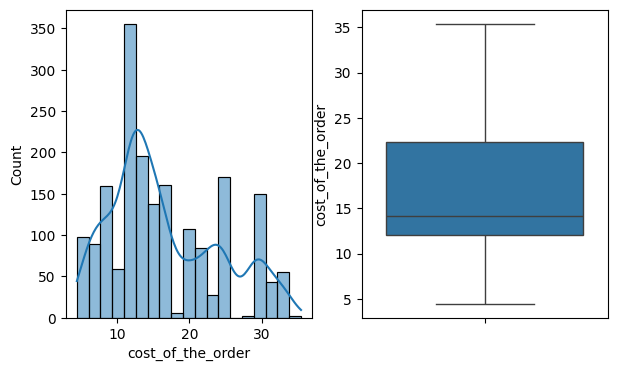

**************************************************
food_preparation_time :

Number of unique values: 16 



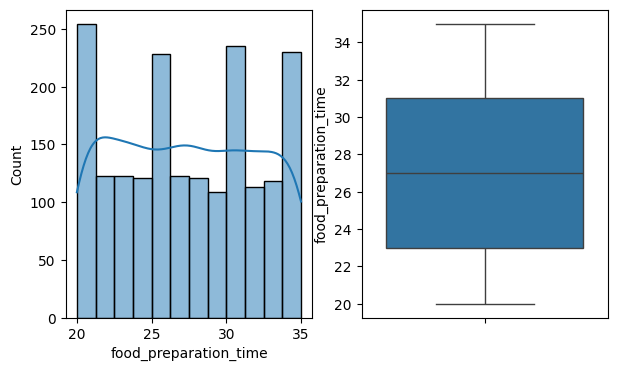

**************************************************
delivery_time :

Number of unique values: 19 



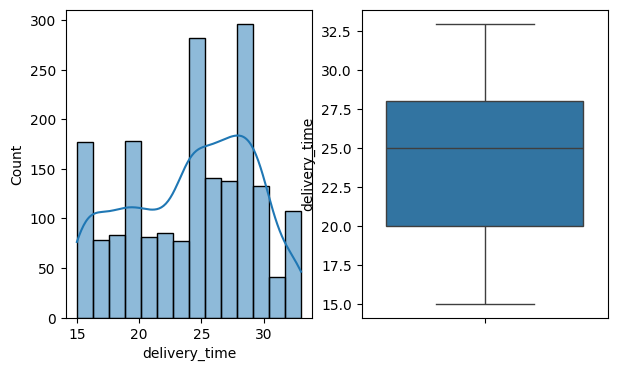

**************************************************
cuisine_type :

Number of unique values 14 



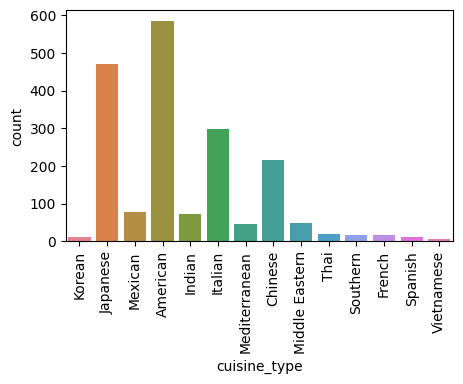

**************************************************
day_of_the_week :

Number of unique values 2 



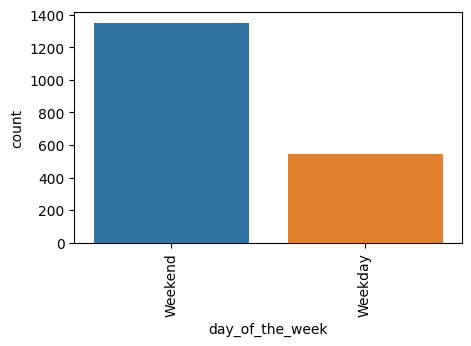

**************************************************
rating :

Number of unique values 4 



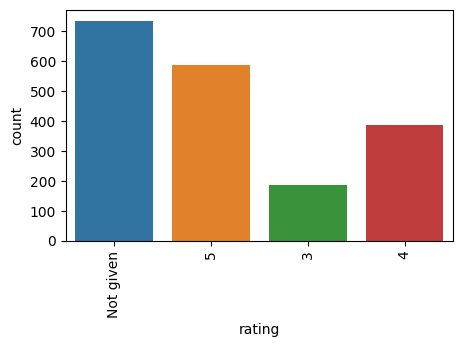

**************************************************


In [ ]:

# Here I am using histograms and boxplots to study the numerical columns, and countplots to study the categorical columns

numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_cols = ['cuisine_type','day_of_the_week','rating']

def plot_numerical(col):

  print(col,':\n')

  print('Number of unique values:', len(df[col].unique()), '\n')

  plt.figure(figsize=(7,4))
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True)
  plt.subplot(1,2,2)
  sns.boxplot(df[col])
  plt.show()
  print('*'*50)

def plot_categorical(col):

  print(col, ':\n')

  print('Number of unique values', len(df[col].unique()), '\n')

  plt.figure(figsize=(5,3))
  sns.countplot(data=df, x=col, hue=col)
  plt.xticks(rotation=90)
  plt.show()
  print('*'*50)

# To get the number of unique values in the following columns which are not expected to follow any pattern.
for col in ['order_id', 'customer_id', 'restaurant_name']:
  print(col, ':\n')
  print('Number of Unique values: ', len(df[col].unique()))
  print('*'*50)

for col in numerical_cols:
  plot_numerical(col)

for col in categorical_cols:
  plot_categorical(col)

#### Observations:


*   **order_id, customer_id**: The order id is unique for each order. There are 1200 unique customer id's, which implies that 1200 different customers have ordered food on the app.
*   **restaurant_name**: There are 178 different restaurants from where food is ordered.


*   **cost_of_the_order**: The density estimate for the cost of the order is a trimodal distribution, which means there are 3 peaks, at around 14, 23 and 30 dollars respectively. The boxplot for the same tells us that the median is around 14 dollars, and that there are no outliers.

*   **food_preparation_time**: The Food preparation time varies from 20 to 35 minutes and its density estimate gives us an almost uniform distribution. The box plot suggests that the median is around 27 minutes. There are no outliers.
*   **delivery_time**: The delivery time density estimate is a distibution with a peak at around 28 minutes and the box plot suggests that the median is around 25 minutes. There are no outliers.


*  **cuisine_type**: American, Japanese, Italian and Chinese are the most ordered cuisines in that order.


*   **day_of_the_week**: The number of orders made on a weekend is more than double the number of orders made on a weekday.
*   **rating**: Majority of the orders(a little more than 700) were not given a rating, while 5 is the most common rating among the rated orders.







### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


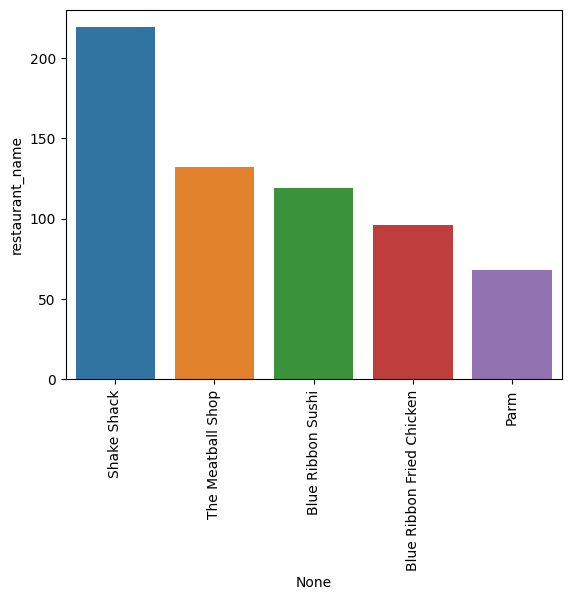

In [ ]:

# .value_counts() returns the number of occurences of each value in descending order, hence using the .head() method we can get the top 5 values
print(df['restaurant_name'].value_counts().head())

# using a barplot to visually represent the findings
sns.barplot(x=df['restaurant_name'].value_counts().head().index, y=df['restaurant_name'].value_counts().head(), hue=df['restaurant_name'].value_counts().head().index)
plt.xticks(rotation=90)
plt.show()

#### Observations:
The following are the top 5 restaurants in terms of number of orders received:

1.   Shake Shack (219 orders)
2.   The Meatball Shop (132 orders)
3.   Blue Ribbon Sushi (119 orders)
4.   Blue Ribbon Fried Chicken (96 orders)
5.   Parm (68 orders)




### **Question 8**: Which is the most popular cuisine on weekends?

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


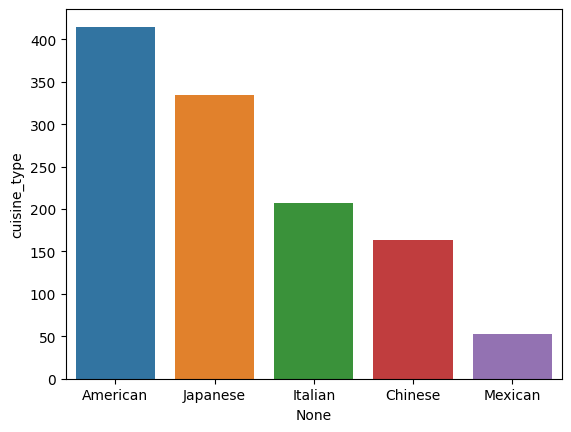

In [ ]:

# Here I am using .loc[] to filter out the dataset for the orders made on weekends and then .value_counts() to get the occurences
print(df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts())

# Using a barplot to visually represent the findings
sns.barplot(x=df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head().index, y=df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(), hue=df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head().index)
plt.show()

#### Observations:


*   American cuisine is the most popular cuisine on weekends.



### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:

# Filtering the dataset and using the shape attribute to get the percentage of orders where the cost is greater than 20 dollars
greater_than_20_percentage = round((df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100, 2)
greater_than_20_percentage

29.24

#### Observations:




*   29.24% of the orders cost more than 20 dollars.





### **Question 10**: What is the mean order delivery time?

In [ ]:

#Using the .mean() method to get the mean value of the delivery_time column
mean_delivery_time = round(df['delivery_time'].mean(), 2)
mean_delivery_time

24.16

#### Observations:


*   The mean order delivery time is 24.16 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:

# Using value_counts() to get the number of occurences
top_3_customers = df['customer_id'].value_counts().head(3).reset_index()
top_3_customers.columns=['customer_id', 'order_count']
top_3_customers

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### Observations:


The top 3 most frequent customer id's are:

1.   52832 (13 orders)
2.   47440 (10 orders)
3.   83287 (9 orders)





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

numerical_cols: ['cost_of_the_order', 'food_preparation_time', 'delivery_time']


<Figure size 500x500 with 0 Axes>

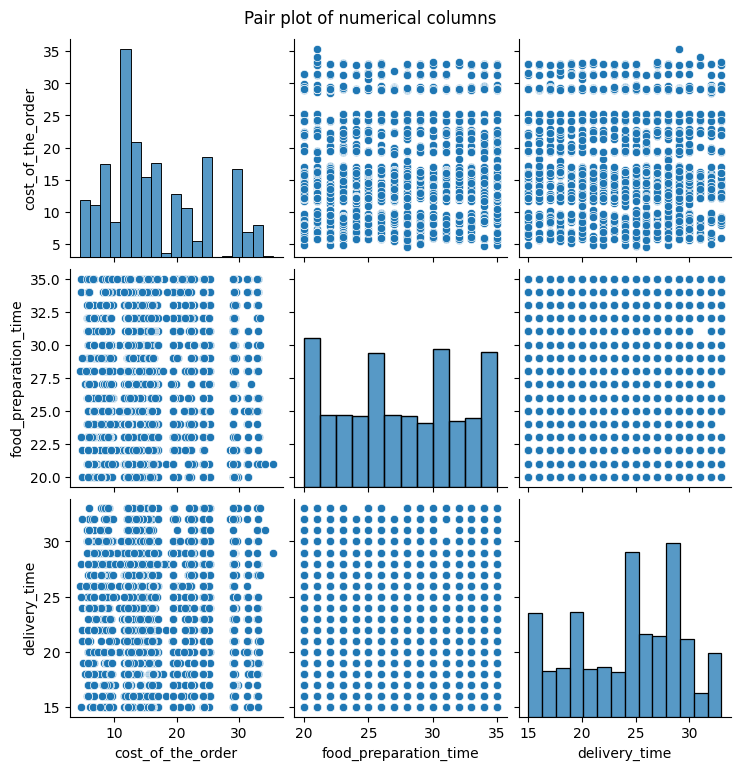

----------------------------------------------------------------------------------------------------


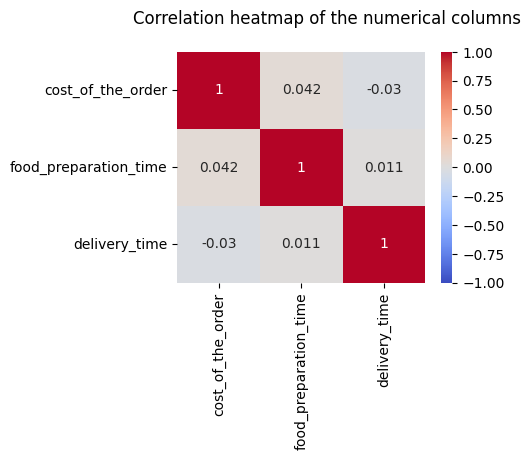

************************************************** 

numerical cols: ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_cols: ['cuisine_type', 'day_of_the_week', 'rating'] 


Restaurants having the lowest food preparation time:
                             food_preparation_time
restaurant_name                                  
Haru Gramercy Park                           20.0
67 Burger                                    20.0
Frank Restaurant                             20.0
DespaÌ±a                                     20.5
Sarabeth's West                              21.0
Lucky Strike                                 21.0
Song Thai Restaurant & Bar                   21.0
Hampton Chutney Co.                          21.0
Samurai Mama                                 21.0
Market Table                                 21.0


Restaurants having the highest food preparation time:
                             food_preparation_time
restaurant_name                        

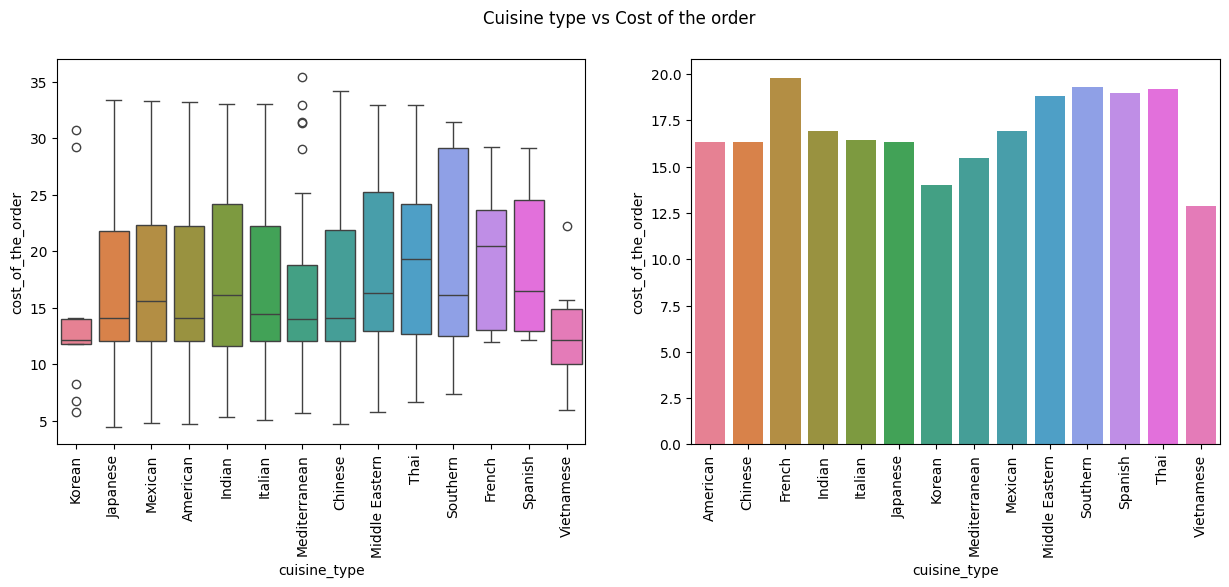

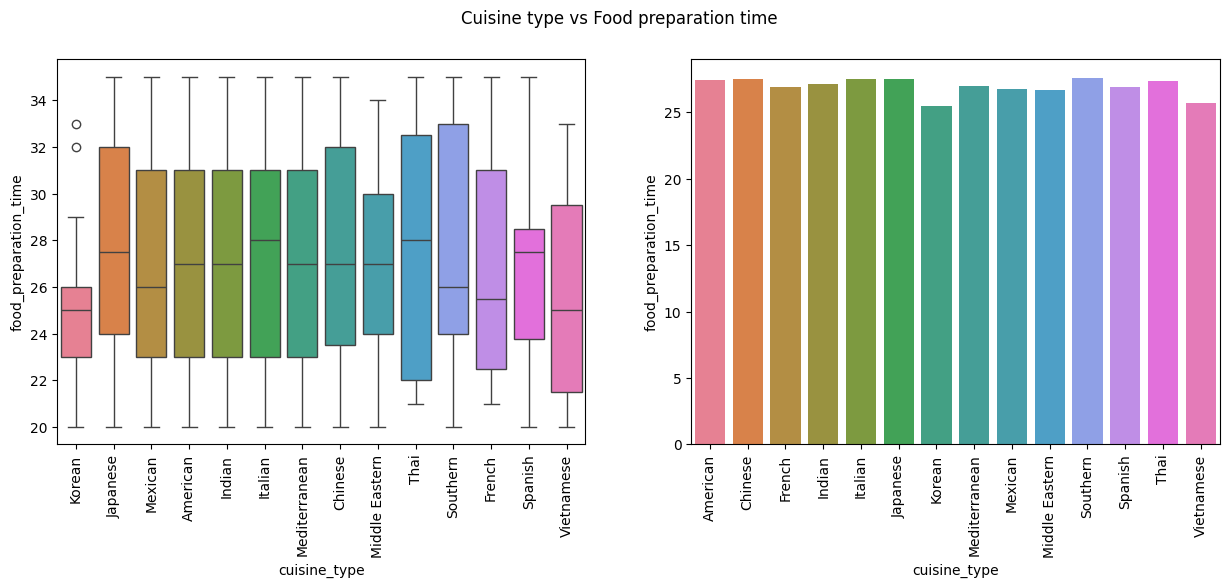

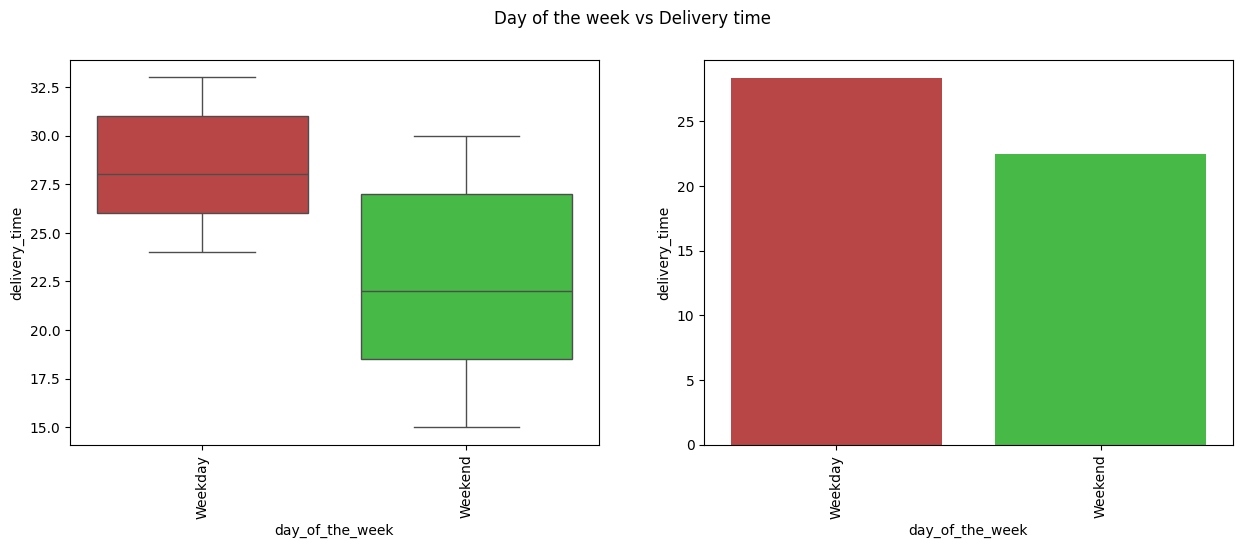

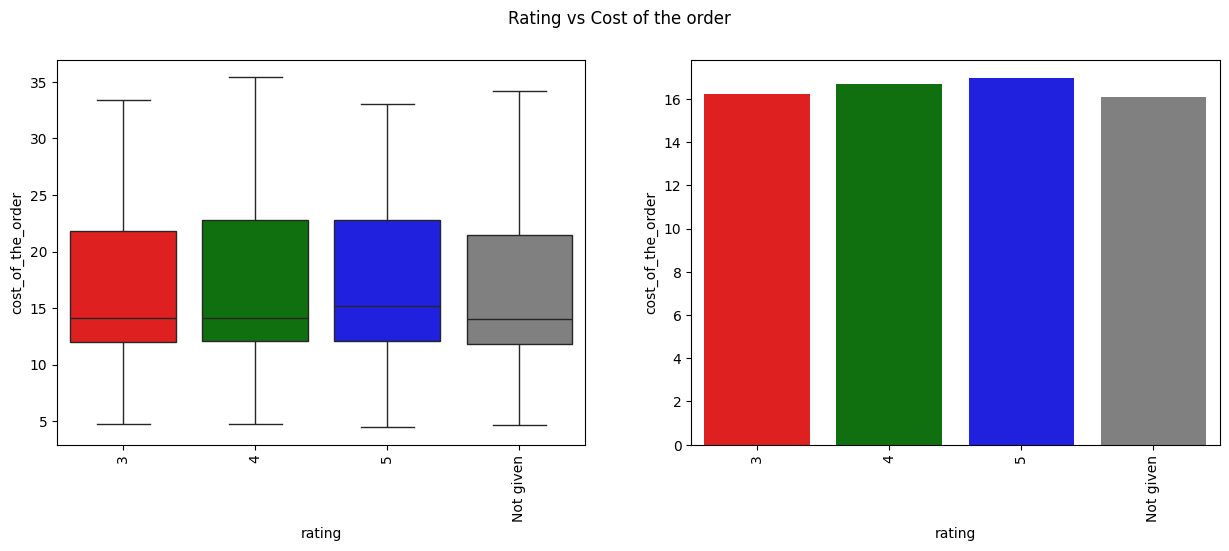

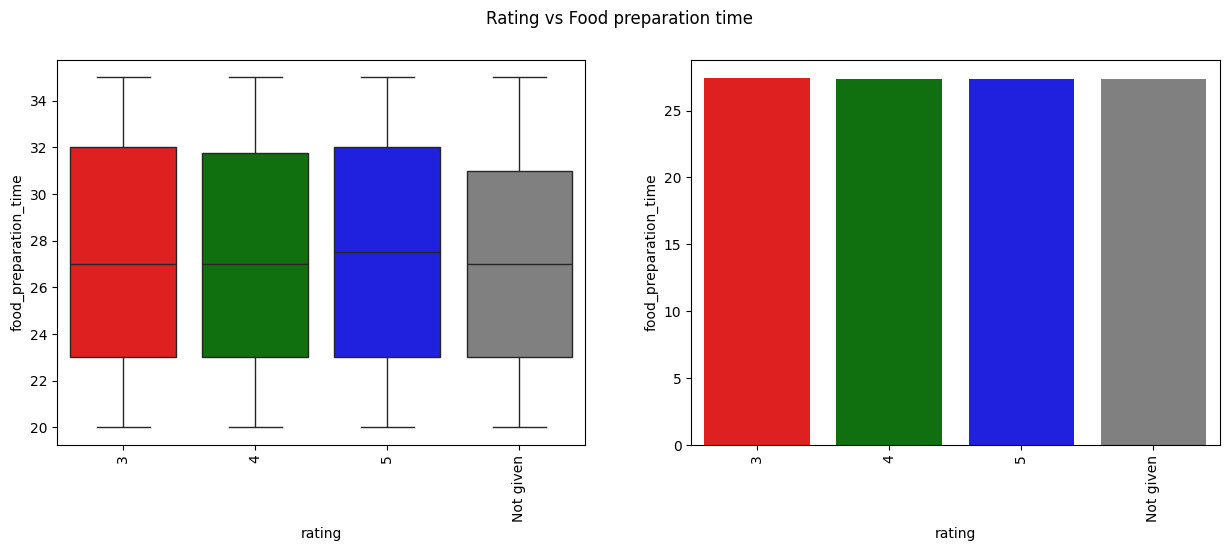

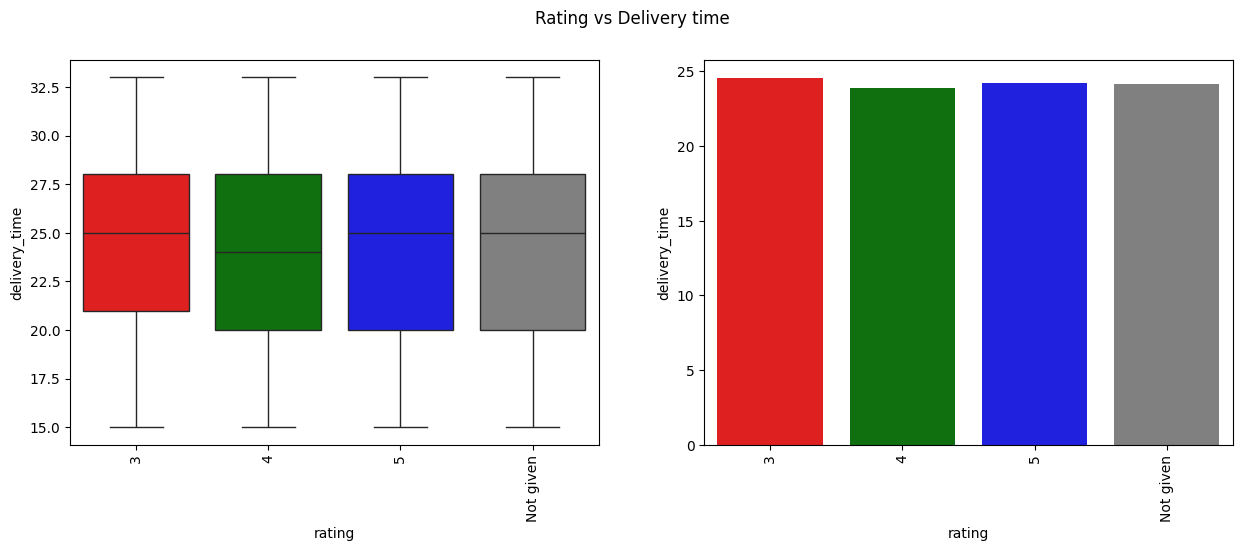

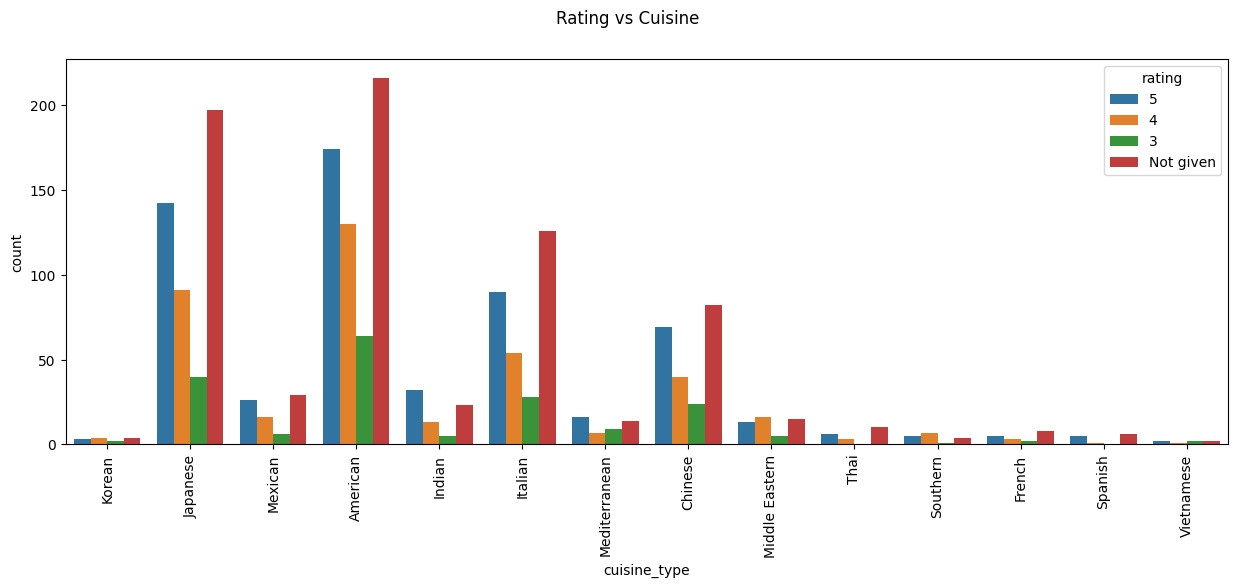

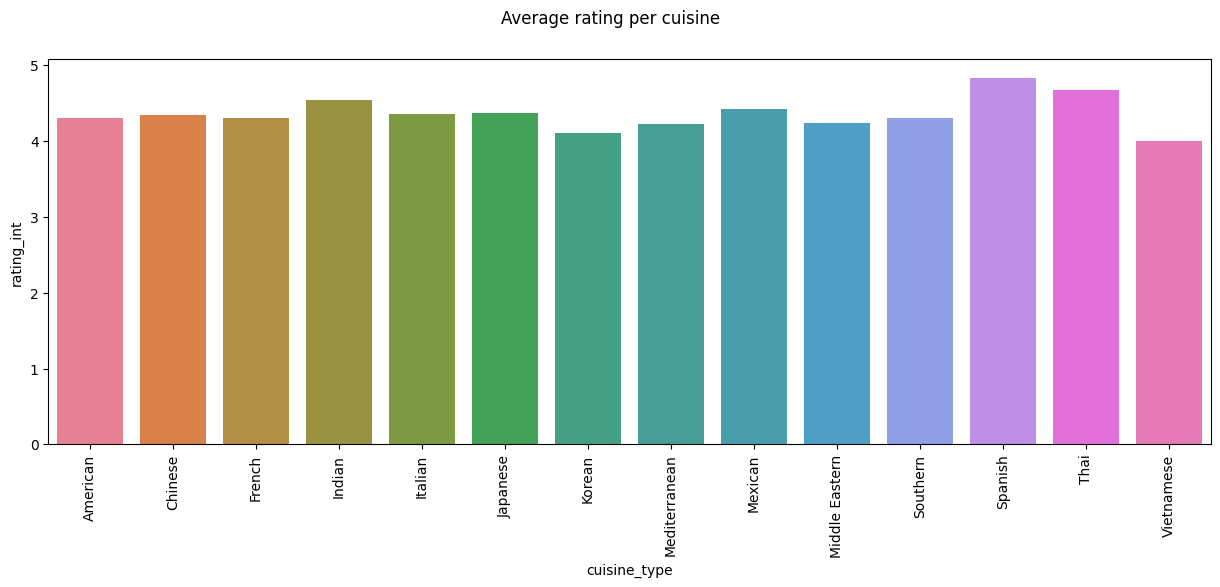

In [ ]:
# Write the code here

# In multivariate analysis, I have tried to explore the relationships among the important variables that are expected
#to have a significant relationship.

# Relations between numerical variables are explored using a pairplot and a correlation heatmap
print('numerical_cols:', numerical_cols)
plt.figure(figsize=(5,5))
sns.pairplot(data = df[numerical_cols])
plt.suptitle('Pair plot of numerical columns', y=1.02)
plt.show()
print('-'*100)
plt.figure(figsize=(4,3))
sns.heatmap(df[numerical_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.suptitle('Correlation heatmap of the numerical columns', y=1.02)
plt.show()
print('*'*50,'\n')

# Relations between numerical and categorical variables are explored using boxplots and barplots, after grouping the data
#according to the categorical column. Since the column restaurant_name has many unique values, it is not
#practical to visually respresent the findings, hence I am printing out the restaurants taking the least
#
print('numerical cols:', numerical_cols)
print('categorical_cols:', categorical_cols, '\n\n')

# Since the column restaurant_name has many unique values, it is not practical to visually respresent the findings,
#hence I am print out the restaurants taking the lowest and highest preparation times
time_grouped_restaurants = pd.DataFrame(df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values())
print('Restaurants having the lowest food preparation time:\n', time_grouped_restaurants.head(10))
print('\n\nRestaurants having the highest food preparation time:\n', time_grouped_restaurants.tail(10))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=pd.DataFrame(df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()), x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation=90)
plt.suptitle('Cuisine type vs Cost of the order')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=pd.DataFrame(df.groupby('cuisine_type')['food_preparation_time'].mean().reset_index()), x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.xticks(rotation=90)
plt.suptitle('Cuisine type vs Food preparation time')
plt.show()

colors = {'Weekday': (0.8,0.2,0.2), 'Weekend': (0.2,0.8,0.2)}
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', order=['Weekday', 'Weekend'], palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=pd.DataFrame(df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()), x='day_of_the_week', y='delivery_time', hue='day_of_the_week', order=['Weekday', 'Weekend'], palette=colors)
plt.xticks(rotation=90)
plt.suptitle('Day of the week vs Delivery time')
plt.show()

colors = {'3':'red', '4':'green', '5':'blue', 'Not given': 'grey'}
order = ['3','4','5','Not given']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='rating', y='cost_of_the_order', hue='rating', order=order, palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=pd.DataFrame(df.groupby('rating')['cost_of_the_order'].mean().reset_index()), x='rating', y='cost_of_the_order', hue='rating', order=order, palette=colors)
plt.xticks(rotation=90)
plt.suptitle('Rating vs Cost of the order')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='rating', y='food_preparation_time', hue='rating', order=order, palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=pd.DataFrame(df.groupby('rating')['food_preparation_time'].mean().reset_index()), x='rating', y='food_preparation_time', hue='rating', order=order, palette=colors)
plt.xticks(rotation=90)
plt.suptitle('Rating vs Food preparation time')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='rating', y='delivery_time', hue='rating', order=order, palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=pd.DataFrame(df.groupby('rating')['delivery_time'].mean().reset_index()), x='rating', y='delivery_time', hue='rating', order=order, palette=colors)
plt.xticks(rotation=90)
plt.suptitle('Rating vs Delivery time')
plt.show()


#relations between two categorical columns are explored using stacked countplots
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type', hue='rating', hue_order=['5','4','3','Not given'])
plt.xticks(rotation=90)
plt.suptitle('Rating vs Cuisine')
plt.show()

# Creating a new dataframe with no row with rating as Not given, and with a new column to store the ratings
#in integer format, and then plotting the average rating for each cuisine
new_df = df.loc[df['rating']!='Not given', ['cuisine_type','rating']]
new_df['rating_int'] = new_df['rating'].astype(int)
plt.figure(figsize=(15,5))
sns.barplot(data=pd.DataFrame(new_df.groupby('cuisine_type')['rating_int'].mean()), x='cuisine_type', y='rating_int', hue='cuisine_type')
plt.xticks(rotation=90)
plt.suptitle('Average rating per cuisine')
plt.show()

#### Observations:



*   **Relations between numerical columns**: It is evident from the pairplot and correlation heatmap that there is no significant relations among the numerical columns.
*   **Cuisine type vs Cost of the order**: French cuisine has the highest median cost of the order while Thai cuisine comes close. Vietnamese and Korean cuisines have the lowest median. French cuisine has the highest average cost per order while Vietnamese cuisine has the lowest average cost per order.

*   **Cuisine type vs Food preparation time**: Korean and Vietnamese cuisines have the lowest median food preparation time, while Thai and Italian cuisines have the highest median food preparation time, even though the difference between all the cuisines is not huge. Considering the average food preparation time, all the cuisines are almost identical, with Korean and Vietnamese cuisines having a slightly less average food preparation time.

*   **Day of the week vs Delivery time**: The median delivery time on weekdays(*~*27.5 minutes) is evidently higher than the median delivery time on weekends(*~*22.5 minutes). The average deliver time per order also follows the same trend, with the time taken being higher on weekdays.
*   **Rating vs Cost of the order**: The third quartile of the cost tends to be a bit higher for 4 and 5 rated orders, and the median cost tends to be a bit higher for 5 rated orders.
*   **Rating vs Food preparation time**: The median of food preparation time tends to be a bit higher for 5 rated orders.
*   **Rating vs Delivery time**: The first quartile of delivery time tends to be lower for 4 and 5 rated orders. Interestingly, the median of the delivery time is lower for 4 rated orders compared to 5 rated orders.
*   **Rating vs Cuisine**: For almost all the cuisines, 5 is the most common rating, followed by 4 and 3. Still, a majority of the orders are not rated.
*   **Average rating per order**: Spanish cuisine has the highest average rating while Vietnamese cuisine has the lowest average rating.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:

# The required columns are filtered out and stored in a new dataframe called top_restaurants
top_restaurants = df[['restaurant_name', 'rating']]

# The rows are filtered for those orders which are given a rating
top_restaurants = top_restaurants.loc[top_restaurants['rating']!='Not given']

# The number of occurence of each restaurant is stored in a pandas series
value_counts = top_restaurants['restaurant_name'].value_counts()

# The rows of top_restaurant are filtered for those orders where the restaurant has been rated at least 50 times in the dataset using the .isin() method
top_restaurants = top_restaurants.loc[top_restaurants['restaurant_name'].isin(value_counts[value_counts>50].index)]

# The ratings are converted to integer to make it possible to calculate the average rating
top_restaurants['rating'] = top_restaurants['rating'].astype(int)

# The average ratings are stored in a pandas series
average_ratings = top_restaurants.groupby('restaurant_name')['rating'].mean()

# The rows of top_restaurant are filtered for those orders where the restaurant has an average rating greater than 4 using the .isin() method
top_restaurants = top_restaurants.loc[top_restaurants['restaurant_name'].isin(average_ratings[average_ratings>4].index)]

# Storing the unique restaurant names in the top_restaurants dataframe to get the restaurants which satisfy the conditions
#of being rated at least 50 times and having an average rating greater than 4
top_restaurants = top_restaurants['restaurant_name'].unique()

for restaurant in top_restaurants:
  print(restaurant)

Blue Ribbon Fried Chicken
Shake Shack
Blue Ribbon Sushi
The Meatball Shop


#### Observations:
The following restaurants are eligible to get the promotional offer:


*   Blue Ribbon Fried Chicken
*   Shake Shack
*   Blue Ribbon Sushi
*   The Meatball Shop



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:

# defining a function to calculate the revenue generated on an order, given the cost of the order as an argument
def calculate_revenue(cost):
  if cost > 20:
    return 0.25*cost
  elif cost > 5:
    return 0.15*cost
  else:
    return 0

# storing the revenue in a new column using the .apply() method
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# storing the total revenue across all the orders in a variable
total_revenue = df['revenue'].sum()

print('Total revenue: ',total_revenue, 'dollars')

Total revenue:  6166.303 dollars


#### Observations:


*   The total revenue generated from all the orders is **6166.303 dollars**.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:

# storing the total time taken to deliver the food from the time the order is placed by adding food_preparation_time and
#delivery_time, in a new column named total_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# filtering the dataset for orders having total_time greater than 60 and finding the corresponding count and percentage values
print('Total number of orders taking more than 60 minutes to get delivered: ', df[df['total_time'] > 60].shape[0])
print('Corresponding percentage: ', round((df[df['total_time'] > 60].shape[0] / df.shape[0])*100, 2))

Total number of orders taking more than 60 minutes to get delivered:  200
Corresponding percentage:  10.54


#### Observations:


*   **10.54%** of the orders take more than 60 minutes to get delivered from the time the order is placed.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

                 delivery_time
day_of_the_week               
Weekday              28.340037
Weekend              22.470022 




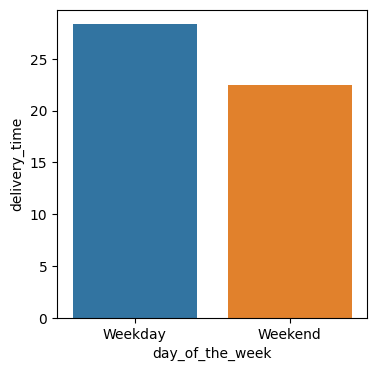

In [ ]:

# using the .groupby() method to group the dataset according to the day of the week (weekday/weekend) and find the mean
#delivery time for each group
day_grouped_df = pd.DataFrame(df.groupby('day_of_the_week')['delivery_time'].mean())
print(day_grouped_df,'\n\n')

# using a barplot to visually represent the findings
plt.figure(figsize=(4,4))
sns.barplot(data=day_grouped_df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.show()

#### Observations:


*   The mean delivery time on weekdays (28.34 minutes) is higher than the delivery time on weekends (22.47 minutes).
*   This could possible be due to the traffic on weekdays.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*  The most ordered cuisines are American, Japanese, Italian and Chinese in that order. The number of orders for these cuisines are significantly higher than that of the other cuisines.
*  Most of the orders are made on the weekends, almost more than double the number of orders made during the weekdays.
*  Among the rated orders, a major portion is rated 5 and 4, and comparatively lesser number of orders are rated 3. There are no 1 or 2 ratings. However, for a large number of orders, the rating is not given.
*  French cuisine tends to cost slightly more than most of the other cuisines, while Korean and Vietnamese cuisines tend to be the cheapest.
*  Even though the number of orders on weekdays are much lesser than that on weekends, the average delivery time on a weekday is much higher than that on the weekends.
*  Spanish cuisine has the highest average rating, and Vietnamese cuisine has the lowest average rating.
*  The most favourite restaurants among people are Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi and The Meatball Shop.

### Recommendations:

**1.  To improve Delivery time on weekends**:


 Even though the number of orders on weekdays are
significantly less compared to that on weekends, the delivery time taken is more. This could result in customer dissatisfaction. The primary cause for this delay is heavy traffic on weekdays. Possible ways to tackle this problem are,

* Integrate real-time traffic updates with the application to provide the customer with a more accurate Estimated Delivery Time.


* Diversify transportation options to adjust to the varying traffic conditions like using bicycles for short distance deliveries to improve navigation through congestion.


* Encourage partner restaurant chains to adopt a cloud-kitchen concept with a centralised order-taking facility in order to create more end points for delivery at an optimal cost.

*   More efficient delivery on weekdays could in turn create more orders on weekdays.

**2. Increase the number of ratings given**

Feedback from customers is crucial to understand customer satisfaction and implement changes accordingly. However, it is noticed that a lot of orders are left unrated. The following are possible ways to persuade more customers into rating their orders-
*   Analyse the user-interface and make sure that it is an easy and straight-forward process to leave a rating.
*   Incentivize rating orders. For example, offer discounts or waive off the delivery fee for every 5 rating that a customer gives.

**3. Personalized Recommendations**

Taste is subjective, hence it is important to keep that in mind while advertising. Performing targeted marketing by understanding each customer's preferences through data analytics and machine learning to make more personalized food recommendations will increase the likelihood of each customer placing an order.

**4.  To increase order volume on weekdays**

Apart from tackling the high delivery time on weekdays, capitalize on the most popular cuisines (American, Japanese, Italian, Chinese) by running targeted promotions and discounts on these cuisines on weekdays to increase the order volume.

**5. Capitalize on the highest-rated cuisine**

Spanish cuisine, being the highest-rated cuisine could be expanded by collaborating with new Spanish restaurants and encouranging existing ones to experiment with their menu by introducing more authentic dishes.

**6. Focus on improving the lowest-rated cuisines**

Analyze and share the feedback data for the lowest-rated cuisines (Korean and Vietnamese), and share it with the corresponding restaurants to to potentially identify and work on the flaws.










---